# Example how-to create a signal time PDF

In this example we demonstrate how to create a signal time PDF with a gaussian shape.

In [1]:
from matplotlib import pyplot as plt
import numpy as np

from skyllh.core.detsigyield import NullDetSigYieldBuilder
from skyllh.core.livetime import Livetime
from skyllh.core.model import SourceModel
from skyllh.core.parameters import ParameterModelMapper
from skyllh.core.signalpdf import SignalTimePDF
from skyllh.core.source_hypo_grouping import (
    SourceHypoGroup,
    SourceHypoGroupManager,
)
from skyllh.core.storage import DataFieldRecordArray
from skyllh.core.trialdata import TrialDataManager
from skyllh.physics.flux_model import (
    GaussianTimeFluxProfile,
    NullFluxModel,
)

First let's construct the ``Livetime`` instance with three detector on-time
intervals:

In [2]:
livetime_data = np.array([
        [1, 3], 
        [4, 7],
        [8, 9],
    ],
    dtype=np.float64)
livetime = Livetime(livetime_data)

Now we can construct the time flux profile. We choose a gaussian profile:

In [3]:
time_flux_profile = GaussianTimeFluxProfile(t0=4, sigma_t=0.2)

The ``t_start`` and ``t_stop`` properties of the profile tell us how far the time profile extends: 

In [4]:
print(f't_start = {time_flux_profile.t_start}')
print(f't_stop = {time_flux_profile.t_stop}')

t_start = 2.5132311244600647
t_stop = 5.486768875539935


In [5]:
sigpdf = SignalTimePDF(
    pmm=None, 
    livetime=livetime, 
    time_flux_profile=time_flux_profile)

In [6]:
shg_mgr = SourceHypoGroupManager(
    SourceHypoGroup(
        sources=SourceModel(),
        fluxmodel=NullFluxModel(),
        detsigyield_builders=NullDetSigYieldBuilder())
)

pmm = ParameterModelMapper(models=shg_mgr.source_list)

t = np.linspace(0, 10, int(10/0.05))
events = DataFieldRecordArray(np.array(t, dtype=[('time', np.float64)]))

tdm = TrialDataManager()
tdm.initialize_trial(
    shg_mgr=shg_mgr, 
    pmm=pmm,
    events=events)

The PDF instance needs to get initialized with the trial data:

In [7]:
sigpdf.initialize_for_new_trial(tdm=tdm)

Now we can evaluate PDF. 

In [8]:
(pd, grads) = sigpdf.get_pd(
    tdm=tdm, 
    src_params_recarray=pmm.create_src_params_recarray([]))

We can verify the normalization of the PDF to unity by integrating the 
probability density values over time:

In [9]:
total_integral = np.sum(pd[1:]*np.diff(t))
print(f'total integral = {total_integral}')

total integral = 1.0200980782124147


We can also plot the PDF:

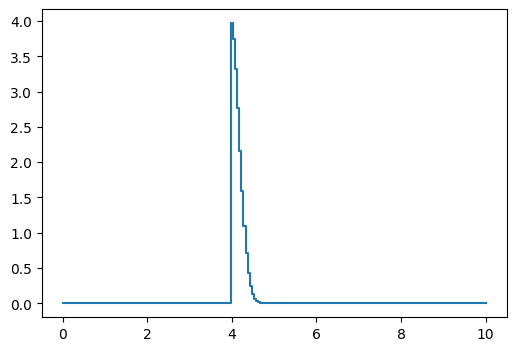

In [10]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.plot(t, pd, drawstyle='steps')